<a href="https://colab.research.google.com/github/MassGH2023/Supervised-Machine-Learning-Classification/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**the Receiver Operating Characteristic (ROC)** curve, a crucial method for evaluating classification metrics, particularly in understanding the trade-offs between sensitivity and false positive rates.
The ROC curve plots sensitivity (true positive rate) on the y-axis against the false positive rate (1 - specificity) on the x-axis, allowing us to visualize model performance across different thresholds.
A perfect model is represented at the top left corner of the ROC space, indicating high sensitivity and low false positive rates.

**The precision-recall curve** is particularly useful for imbalanced datasets, showing the trade-off between precision and recall at various thresholds.
Choosing the right metric depends on the context of the problem, such as the costs associated with false positives and false negatives, which can guide the selection of an appropriate decision threshold.

In [46]:
import seaborn as sns, pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

the data was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset:

    Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
    Triaxial Angular velocity from the gyroscope
    A 561-feature vector with time and frequency domain variables
    The activity label


The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.


In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [3]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [7]:
data.shape

(10299, 562)

In [9]:
data.dtypes.value_counts()

,count
float64,561
object,1


the data is already scaled between -1 and 1.

In [12]:
data.iloc[:,:-1].min().value_counts()

,count
-1.0,561


In [13]:
data.iloc[:,:-1].max().value_counts()

,count
1.0,561


In [16]:
data.Activity.unique(), len(data.Activity.unique())

(array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
        'WALKING_UPSTAIRS'], dtype=object),
 6)

To make predictions in Scikit-learn, the target column (i.e., "Activity") must be integers or a dense array. A dense array is a standard array where all elements are explicitly stored, even if some are zeros. It's the opposite of a sparse matrix, which only stores non-zero elements to save memory.

In [21]:
le = LabelEncoder()

data['Activity'] = le.fit_transform(data['Activity'])
data['Activity'].sample(5)

,Activity
9081,1
10133,2
6372,3
10125,2
4146,5


In [26]:
dict(zip(le.classes_, range(len(le.classes_))))

{'LAYING': 0,
 'SITTING': 1,
 'STANDING': 2,
 'WALKING': 3,
 'WALKING_DOWNSTAIRS': 4,
 'WALKING_UPSTAIRS': 5}

I make a correlation matrix for the dependent variables.
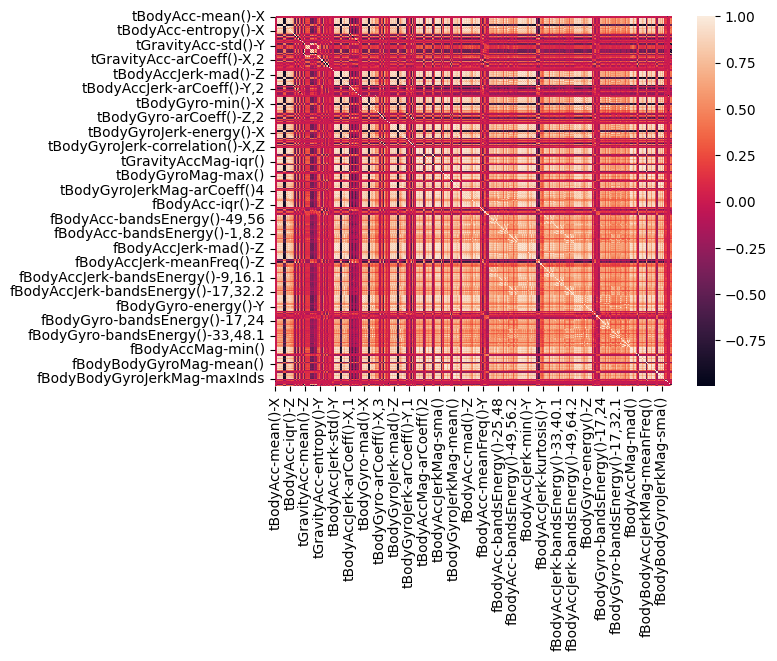

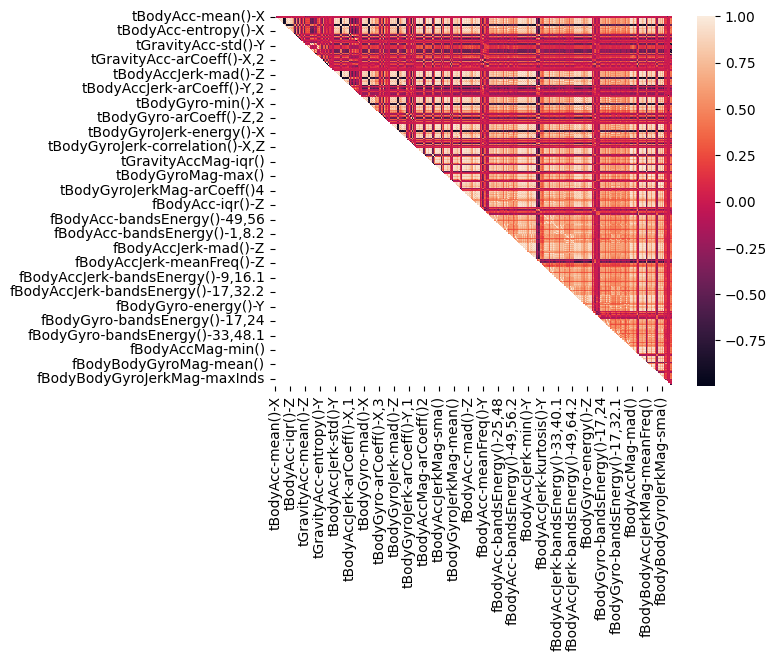

In [33]:
features = [x for x in data.columns if x != "Activity"]
feature_cols = data[features]
corr = data[features].corr()

tril_index = np.tril_indices_from(corr)
tril_index[0]

array([  0,   1,   1, ..., 560, 560, 560])

In [36]:
for coord in zip(*tril_index): #The * in *tril_index is used for argument unpacking.
  corr.iloc[coord[0], coord[1]] = np.NaN # so we have only the diagnal upper values

an alternative way is:

    corr_array = np.array(corr)
    corr_array[np.tril_indices_from(corr)] = np.nan

In [44]:
corr= corr.stack().to_frame().reset_index().rename(columns = {"level_0":"feature1", "level_1":"feature2", 0: "correlation"})

corr['absolute_correlation'] = corr['correlation'].abs()

In [67]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [77]:
plt.style.use('bmh')
colors = sns.color_palette()
colors

[(0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.6509803921568628, 0.023529411764705882, 0.1568627450980392),
 (0.47843137254901963, 0.40784313725490196, 0.6509803921568628),
 (0.27450980392156865, 0.47058823529411764, 0.12941176470588237),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.0, 0.4470588235294118, 0.6980392156862745)]

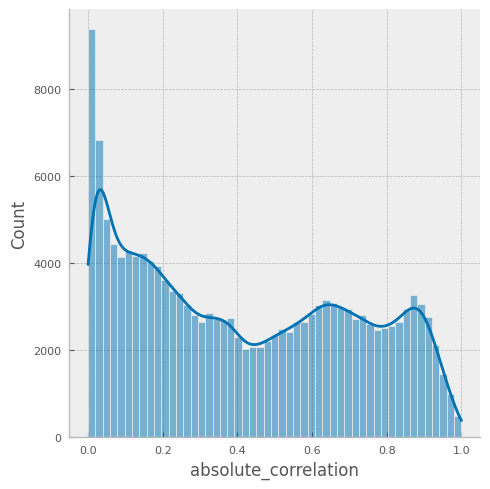

In [82]:
sns.displot(corr['absolute_correlation'], kde = 1, color= colors[-1]);

alternatively:

    corr['absolute_correlation'].hist(bins = 50, color = colors[0])


In [86]:
corr.sort_values("correlation", ascending = 0).query("absolute_correlation > 0.8") # we need to select the most important features that lead to the highest correlations

,feature1,feature2,correlation,absolute_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


# Train-Test Split

StratifiedShuffleSplit is a combination of both ShuffleSplit and StratifiedKFold. Using StratifiedShuffleSplit the proportion of distribution of class labels is almost even between train and test dataset. The major difference between StratifiedShuffleSplit and StratifiedKFold (shuffle=True) is that in StratifiedKFold, the dataset is shuffled only once in the beginning and then split into the specified number of folds. This discards any chances of overlapping of the train-test sets.
However, in StratifiedShuffleSplit the data is shuffled each time before the split is done and this is why there’s a greater chance that overlapping might be possible between train-test sets.

In [94]:
from sklearn.model_selection import StratifiedShuffleSplit

StShuffSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.3,
                             random_state=0)

# type(StShuffSplit)

# tr_i, tst_i =
tr_i, tst_i = next(StShuffSplit.split(data[features], data["Activity"]))

In [99]:
X_tr = data.loc[tr_i, features]
X_tst = data.loc[tst_i, features]
y_tr = data.loc[tr_i, "Activity"]
y_tst = data.loc[tst_i, "Activity"]


In [106]:
round(y_tr.value_counts(normalize = 1),2)

,proportion
Activity,
0,0.19
2,0.19
1,0.17
3,0.17
5,0.15
4,0.14


In [105]:
round(y_tst.value_counts(normalize = 1),2)

,proportion
Activity,
0,0.19
2,0.19
1,0.17
3,0.17
5,0.15
4,0.14


solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’

Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

**For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;**

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ and ‘newton-cholesky’ can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass setting one can wrapt it with the OneVsRestClassifier.

‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.


In [110]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver="liblinear")
LR.fit(X_tr, y_tr)

LogisticRegression(solver='liblinear')

In [114]:
from sklearn.linear_model import LogisticRegressionCV

LR_L1 = LogisticRegressionCV(Cs = 10, cv = 4, penalty= 'l1', solver=  "liblinear")
LR_L1.fit(X_tr, y_tr)

LR_L2 = LogisticRegressionCV(Cs = 10, cv = 4, penalty= 'l2', solver=  "liblinear")
LR_L2.fit(X_tr, y_tr)

LogisticRegressionCV(cv=4, solver='liblinear')

In [116]:
coeffs = []

coef_labels = ["LR", "LR_L1", "LR_L2"]
coef_models = [LR, LR_L1, LR_L2]
for lab, mod in zip(coef_labels, coef_models):

  coefs = mod.coef_
  coef_label = pd.MultiIndex(levels = [[lab], [0,1,2,3,4,5]],codes = [[0,0,0,0,0,0], [0,1,2,3,4,5]])

  coeffs.append(pd.DataFrame(coefs.T, columns = coef_label))

In [118]:
coeffs = pd.concat(coeffs, axis =1 )

In [119]:
coeffs.sample(10)

LR                                                       LR_L1  \
            0         1         2         3         4         5         0   
1    0.013672 -0.120762  0.038534 -0.026756  0.200731 -0.276117  0.000000   
82  -0.023374 -0.175611  0.312904 -0.028392  0.074709 -0.115050  0.000000   
513  0.063019  0.327994 -0.361498 -0.766239  0.040151  0.320493 -0.031869   
14   0.038790  0.518173 -0.352389 -0.088584 -0.389023 -0.064971  0.069237   
88  -0.035400  0.040294 -0.266355  0.134769  0.166730 -0.606576 -0.026913   
183  0.117211  2.068790 -2.113079  0.149655  0.609279 -0.431092  0.352704   
539 -0.044915 -0.172488  0.045740  0.136512 -0.435422 -0.114718 -0.298676   
230 -0.036874  0.048206 -0.142991  0.046873 -0.309530  0.518145  0.000000   
202  0.092692 -0.044421  0.084965 -0.849968  0.519742 -0.451416  0.129631   
523 -0.047397 -0.468534  1.020634  0.223607  0.129671  0.725797 -0.237621   

                                                          LR_L2            \
            1         2         3         4         5         0         1   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.022647 -0.799165   
82  -0.957886  0.705829 -0.035775  0.000000  0.588829 -0.028568 -1.173944   
513  0.538968 -0.165414 -1.782918  0.000000  0.583269  0.064090  2.615840   
14   1.908562 -0.155563  0.000000 -0.565185  0.000000  0.046187  3.149844   
88   0.000000  0.000000  0.000000  0.148154 -0.846064 -0.050981  0.213295   
183  5.391806 -4.760720  0.000000  0.950681 -1.265222  0.222903  5.894067   
539 -0.403782  0.369142  0.000000 -1.048629  0.000000 -0.129922 -2.298448   
230  0.000000  0.000000  0.000000 -0.197870  0.775643 -0.057487  0.738582   
202  0.000000  0.000000 -0.727770  0.718147 -0.765936  0.151647 -0.516952   
523 -0.135110  1.461783  0.000000  0.000000  2.101992 -0.028020  1.088748   

                                             
            2         3         4         5  
1    0.146153 -0.160512  0.686945 -0.920603  
82   0.667026 -0.477704  0.049503  0.100030  
513 -0.600565 -2.158984  0.372662  1.292470  
14  -0.883837 -0.393157 -1.544781 -0.435337  
88  -0.409351  0.321740  0.471479 -2.149317  
183 -3.270590  0.134517  2.233982 -2.142588  
539  0.470000 -0.024903 -1.862986  0.207985  
230 -0.222901 -0.215316 -0.990379  1.125049  
202  0.186118 -2.551898  1.616219 -1.284714  
523  1.540333  0.612987  0.203586  2.539444

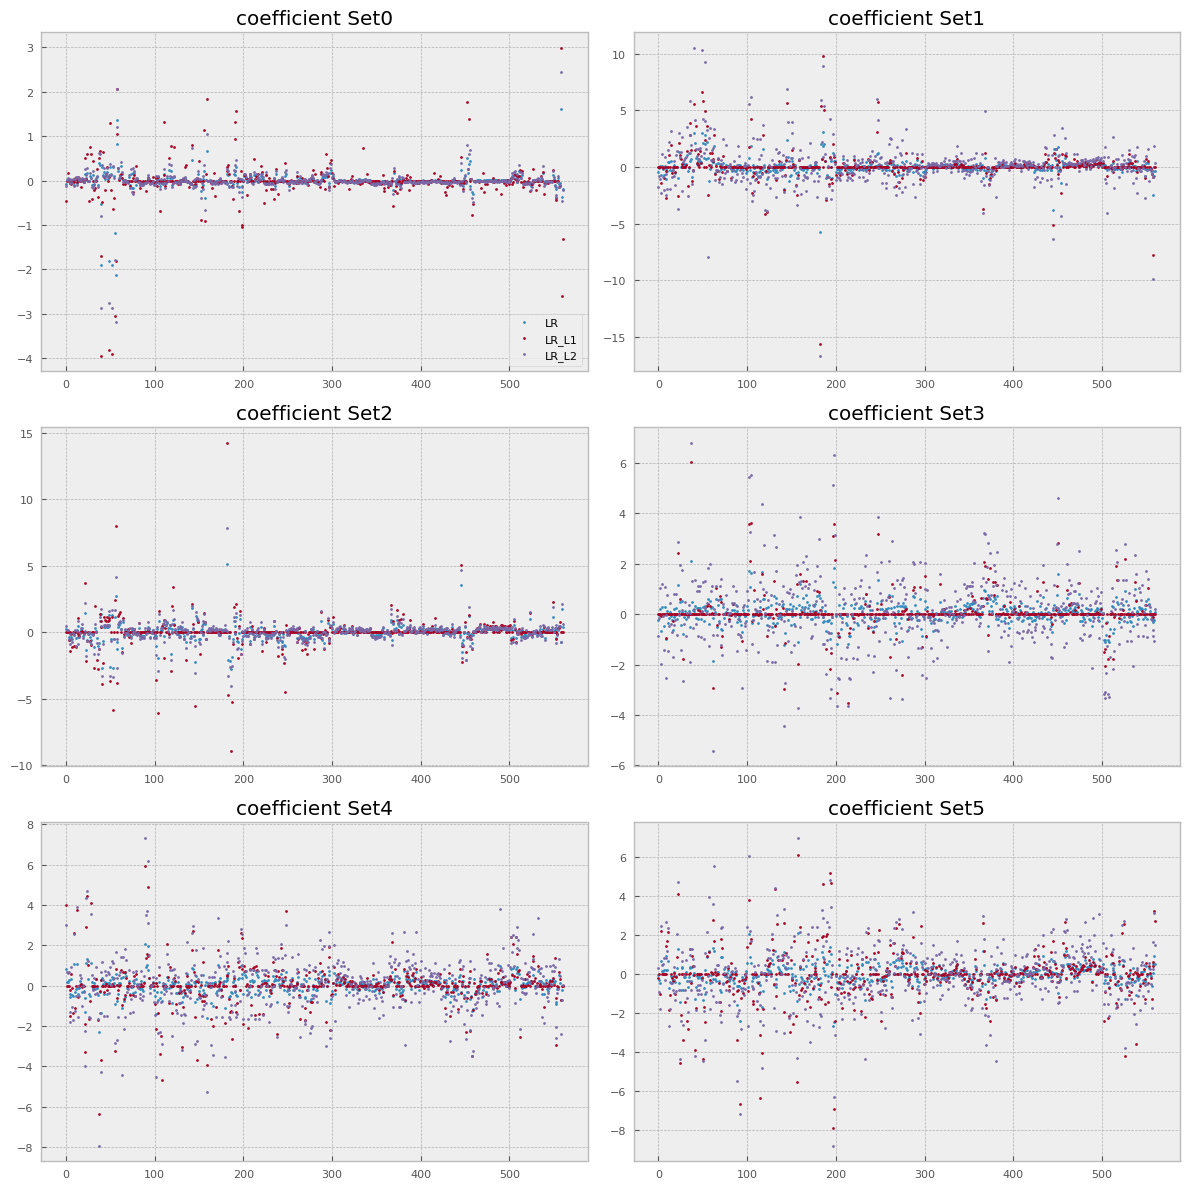

In [125]:
fig, ax  = plt.subplots(3,2, figsize = (12,12))

ax = ax.flatten()

for l, a in enumerate(ax):
  data =coeffs.xs(l, level =1, axis =1)
  data.plot(marker = "o", ls = "", ms = 2.0, ax =a , legend = False)

  if a is ax[0]:
    a.legend(loc =4)

  a.set(title = "coefficient Set" + str(l))

plt.tight_layout()

In [129]:
y_pred = []
y_prob = []

coef_labels = ["LR", "LR_L1", "LR_L2"]
coef_models = [LR, LR_L1, LR_L2]

for lab, mod in zip(coef_labels,coef_models):

  y_pred.append(pd.Series(mod.predict(X_tst), name = lab))
  coeff_label = pd.MultiIndex(levels= [[lab], [0,1,2,3,4,5]], codes = [[0,0,0,0,0,0], [0,1,2,3,4,5]])



  y_prob.append(pd.DataFrame(mod.predict_proba(X_tst), columns = coeff_label))


y_pred  = pd.concat(y_pred, axis = 1)
y_prob= pd.concat(y_prob, axis = 1)

In [130]:
y_pred.head()


,LR,LR_L1,LR_L2
0,0,0,0
1,4,4,4
2,2,2,2
3,4,4,4
4,4,4,4


In [131]:
y_prob.head()

LR                                                          \
          0             1             2             3             4   
0  0.999543  3.671432e-04  1.463947e-10  2.619053e-05  5.895089e-07   
1  0.000039  4.295263e-08  6.954680e-04  1.760664e-04  9.582481e-01   
2  0.000026  1.909507e-01  8.090036e-01  5.999327e-09  2.003731e-05   
3  0.000021  1.149223e-07  3.742957e-07  4.738314e-05  8.990415e-01   
4  0.000042  4.940068e-07  6.339932e-05  3.277302e-05  9.947264e-01   

                        LR_L1                                            \
              5             0             1             2             3   
0  6.357361e-05  9.999993e-01  4.179518e-07  4.676843e-16  3.011597e-07   
1  4.084100e-02  1.932048e-05  6.741007e-10  1.566204e-04  3.164447e-05   
2  1.896169e-08  1.461264e-07  1.227274e-01  8.772725e-01  7.834800e-12   
3  1.008895e-01  1.385282e-05  3.594366e-11  2.823281e-07  1.000136e-05   
4  5.135059e-03  1.299873e-06  4.950396e-09  8.643975e-06  1.431764e-06   

                                      LR_L2                              \
              4             5             0             1             2   
0  1.411372e-11  2.692114e-11  1.000000e+00  4.360192e-09  1.523999e-13   
1  9.932228e-01  6.569596e-03  2.998949e-06  3.834169e-15  1.063861e-04   
2  3.120565e-09  3.937511e-13  1.619419e-07  9.071005e-02  9.092898e-01   
3  9.887015e-01  1.127439e-02  1.273145e-06  4.661065e-17  1.360197e-08   
4  9.999826e-01  6.036971e-06  2.389459e-06  2.557904e-12  4.116315e-06   

                                             
              3             4             5  
0  1.821830e-11  1.520269e-17  3.760590e-11  
1  3.480100e-12  9.996939e-01  1.967284e-04  
2  2.339667e-24  2.060794e-13  1.764433e-19  
3  3.714397e-12  9.981995e-01  1.799188e-03  
4  5.357007e-12  9.999932e-01  3.111221e-07

In [144]:
# y_prob.loc[0, (LR_L1, 2)]
np.sum(y_prob.loc[3, pd.IndexSlice['LR_L1', :]])



1.0

In [160]:
y_probLR = pd.DataFrame(np.round(LR.predict_proba(X_tst),4))

In [161]:
y_probLR["original_i"] = tst_i

In [162]:
y_probLR

,0,1,2,3,4,5,original_i
0,0.9995,0.0004,0.0000,0.0000,0.0000,0.0001,7230
1,0.0000,0.0000,0.0007,0.0002,0.9582,0.0408,478
2,0.0000,0.1910,0.8090,0.0000,0.0000,0.0000,5888
3,0.0000,0.0000,0.0000,0.0000,0.8990,0.1009,2174
4,0.0000,0.0000,0.0001,0.0000,0.9947,0.0051,3002
...,...,...,...,...,...,...,...
3085,0.0000,0.0423,0.9576,0.0000,0.0001,0.0000,5675
3086,0.0000,0.0000,0.0000,0.0000,0.9709,0.0290,3568
3087,0.0000,0.0007,0.0000,0.9965,0.0026,0.0002,8646
3088,0.9996,0.0004,0.0000,0.0000,0.0000,0.0000,2797


In [163]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

from sklearn.preprocessing import label_binarize



In [192]:
metrics = []
cm = {}

for lab in coef_labels:
  # print(lab)
  precision, recall, fscore, _ = score(y_tst, y_pred[lab],average= 'weighted')
  accu = accuracy_score(y_tst, y_pred[lab])
  auc = roc_auc_score(label_binarize (y_tst, classes= [0,1,2,3,4,5]), y_prob[lab], average= 'weighted')

  cm[lab] = confusion_matrix(y_tst, y_pred[lab])


  metrics.append(pd.Series({'precision':precision, "recall": recall, "fscore": fscore, "accuracy" : accu, "auc" : auc}, name =lab))

In [193]:
metrics = pd.concat(metrics, axis = 1)

In [194]:
round(metrics,4)

,LR,LR_L1,LR_L2
precision,0.9871,0.9877,0.9874
recall,0.9871,0.9877,0.9874
fscore,0.9871,0.9877,0.9874
accuracy,0.9871,0.9877,0.9874
auc,0.9993,0.9994,0.9993


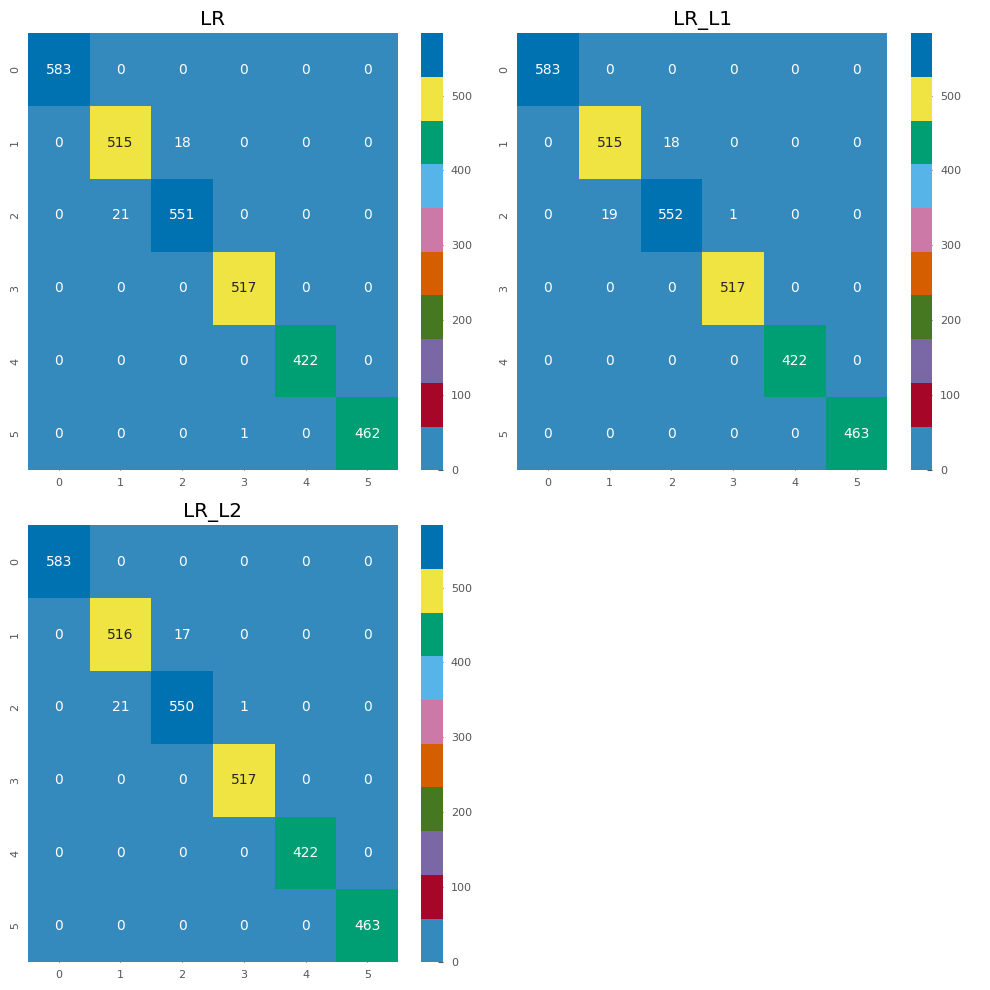

In [201]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

ax = ax.flatten()
ax[-1].axis("off")
for ax , lab in zip(ax, coef_labels):

  sns.heatmap(cm[lab], ax = ax, annot = True, fmt = 'd', cmap = colors)
  ax.set(title = lab)


plt.tight_layout()

In [207]:
pd.DataFrame(le.classes_).reset_index().rename(columns = {'index': 'encoder',0: 'classes'})

,encoder,classes
0,0,LAYING
1,1,SITTING
2,2,STANDING
3,3,WALKING
4,4,WALKING_DOWNSTAIRS
5,5,WALKING_UPSTAIRS
